In [172]:
#Importiamo le librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#Leggiamo il dataset
dataset = pd.read_csv('smart_mobility_dataset.csv')

dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low


# SMOTE

In [173]:
# Elimina la colonna Accident_Report
dataset= dataset.drop(columns=['Accident_Report'])
dataset.head()
# cancellazione delle feature inutili per i nostri obiettivi
dataset=dataset.drop(columns=['Sentiment_Score', 'Ride_Sharing_Demand', 'Parking_Availability'], axis=1)
dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,364.466342,16.801459,Low


In [174]:
# Inizializziamo il LabelEncoder
encoder = LabelEncoder()

# Applichiamo il Label Encoding alle colonne categoriche
# codifica delle categotie in ordine alfabetico ma a noi non va bene per Traffic_Condition

# Mappatura personalizzata per Traffic_Condition
traffic_condition_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Applichiamo il mapping
dataset['Traffic_Condition'] = dataset['Traffic_Condition'].map(traffic_condition_mapping)

# Applichiamo il Label Encoding per le altre colonne
columns_to_encode = ['Traffic_Light_State', 'Weather_Condition']
for col in columns_to_encode:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0


In [175]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

def classify_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

dataset['Timestamp'] = dataset['Timestamp'].dt.hour.apply(classify_time)
dataset['Timestamp'] = encoder.fit_transform(dataset['Timestamp'])
dataset.rename(columns={'Timestamp': 'Time_of_Day'}, inplace=True)
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,3,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2
1,3,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2
2,3,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2
3,3,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2
4,3,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0


In [176]:
df_cong = dataset[['Vehicle_Count', 'Road_Occupancy_%']].copy()

# Normalizziamo dei dati di congestione
scaler = MinMaxScaler()
df_cong[['Vehicle_Count_norm', 'Road_Occupancy_norm']] = scaler.fit_transform(df_cong)

#calcolo dell'indice di congestione
dataset['Congestion_Index'] = 0.4 * df_cong['Vehicle_Count_norm'] + 0.6 * df_cong['Road_Occupancy_norm']
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Congestion_Index
0,3,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2,0.754243
1,3,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2,0.504586
2,3,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2,0.820093
3,3,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2,0.221985
4,3,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0,0.156801


In [177]:
dataset= dataset.drop(columns=['Road_Occupancy_%'])
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Congestion_Index
0,3,40.842275,-73.703149,205,49.893435,2,0,450.760055,19.574337,2,0.754243
1,3,40.831119,-73.987354,202,22.383965,0,0,321.800341,5.385554,2,0.504586
2,3,40.819549,-73.732462,252,46.889699,0,2,231.152655,10.277477,2,0.820093
3,3,40.725849,-73.980134,37,5.730536,1,1,410.384292,29.243279,2,0.221985
4,3,40.813265,-73.961631,64,61.348034,1,3,364.466342,16.801459,0,0.156801


In [178]:
from sklearn.model_selection import train_test_split

# 1. Separazione delle variabili
X = dataset.drop("Traffic_Condition", axis=1)
y = dataset["Traffic_Condition"]

# 2. Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Applica SMOTE al training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 4. Verifica le classi dopo SMOTE
print("Distribuzione classi dopo SMOTE:")
print(pd.Series(y_resampled).value_counts())

Distribuzione classi dopo SMOTE:
Traffic_Condition
2    2199
1    2199
0    2199
Name: count, dtype: int64


✅ Training Accuracy: 1.0000
✅ Test Accuracy: 0.9327

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        94
           1       0.87      0.95      0.90       439
           2       0.98      0.93      0.95       967

    accuracy                           0.93      1500
   macro avg       0.89      0.94      0.91      1500
weighted avg       0.94      0.93      0.93      1500



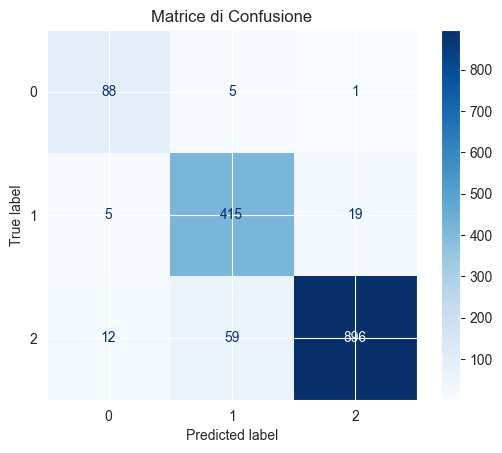

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 4. Addestra il modello sui dati bilanciati
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 5. Calcola la training accuracy
y_train_pred = model.predict(X_resampled)
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print(f"✅ Training Accuracy: {train_accuracy:.4f}")

# 6. Calcola la test accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

# 7. Report completo
print("\n📊 Classification Report:")
print(classification_report(y_test, y_test_pred))

# 8. Matrice di confusione
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice di Confusione")
plt.show()


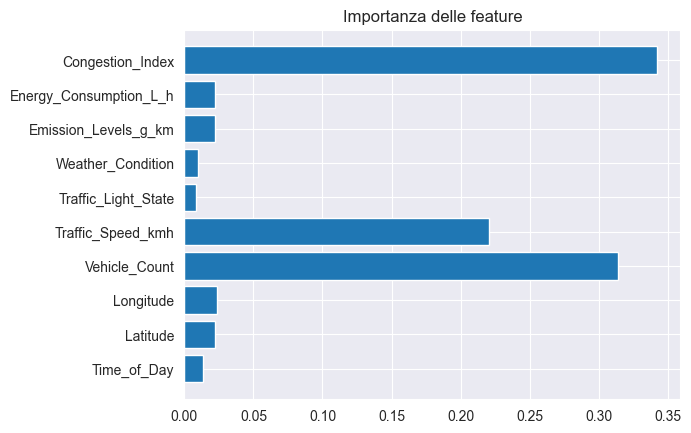

In [180]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Importanza delle feature")
plt.show()


Feature selezionate con RFE: ['Vehicle_Count', 'Traffic_Speed_kmh', 'Congestion_Index']
Training Accuracy: 0.9997
Test Accuracy: 0.9460

Classification Report Test:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        94
           1       0.89      0.97      0.92       439
           2       0.99      0.93      0.96       967

    accuracy                           0.95      1500
   macro avg       0.91      0.96      0.94      1500
weighted avg       0.95      0.95      0.95      1500



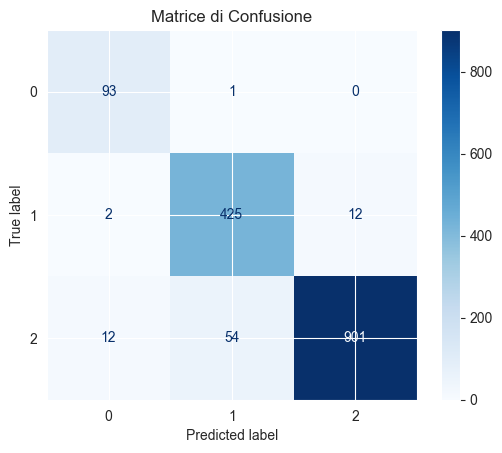

In [181]:
from sklearn.feature_selection import RFE

# 1. Definisci X e y (tutte le feature)
X = dataset.drop("Traffic_Condition", axis=1)
y = dataset["Traffic_Condition"]

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Applica SMOTE solo al training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 4. Definisci il modello per RFE
model = RandomForestClassifier(random_state=42)

# 5. Esegui RFE per selezionare le top 3 feature
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_resampled, y_resampled)

# 6. Ottieni le feature selezionate
selected_features = X.columns[rfe.support_].tolist()
print("Feature selezionate con RFE:", selected_features)

# 7. Allena il modello con solo le feature selezionate
X_resampled_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_resampled_selected, y_resampled)

# 8. Valutazione
y_train_pred = model.predict(X_resampled_selected)
y_test_pred = model.predict(X_test_selected)

print(f"Training Accuracy: {accuracy_score(y_resampled, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report Test:")
print(classification_report(y_test, y_test_pred))

# 9. Matrice di confusione
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice di Confusione")
plt.show()


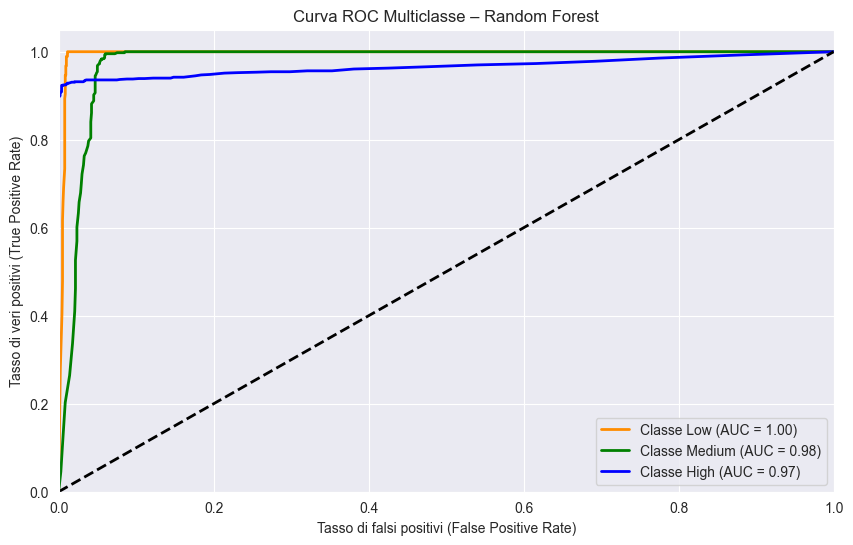

In [182]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Binarizzazione delle etichette del test set
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Predizione delle probabilità sul test set (usando solo le feature selezionate)
y_score = model.predict_proba(X_test_selected)

# Calcolo curve ROC e AUC per ogni classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colori e nomi classi
colors = cycle(['darkorange', 'green', 'blue'])
class_names = ['Low', 'Medium', 'High']

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di falsi positivi (False Positive Rate)')
plt.ylabel('Tasso di veri positivi (True Positive Rate)')
plt.title('Curva ROC Multiclasse – Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [183]:
from sklearn.model_selection import RandomizedSearchCV

# Parametri da ottimizzare
param_grid = {
    'n_estimators': [100, 200, 300],          # numero di alberi
    'max_depth': [10, 20, 30, None],          # profondità massima
    'min_samples_split': [2, 5, 10],          # minimi campioni per split
    'min_samples_leaf': [1, 2, 4],            # minimi campioni in foglia
    }

grid_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

print("Migliori parametri:", grid_search.best_params_)
print("Score migliore:", grid_search.best_score_)

Migliori parametri: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Score migliore: 0.963166770050773


Training Accuracy: 1.0000
Test Accuracy: 0.9287

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        94
           1       0.86      0.94      0.90       439
           2       0.97      0.92      0.95       967

    accuracy                           0.93      1500
   macro avg       0.90      0.93      0.91      1500
weighted avg       0.93      0.93      0.93      1500



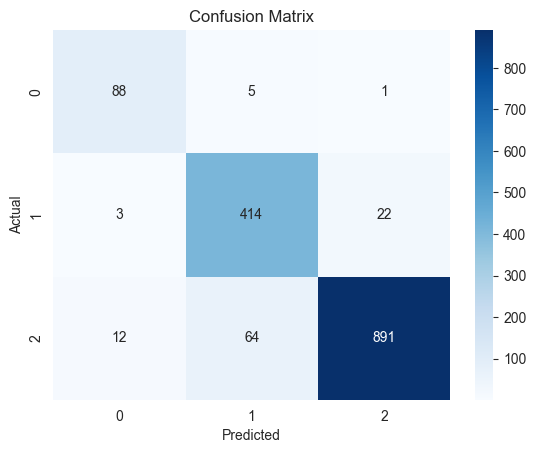

Cross-Validation Accuracy: 0.9630 (+/- 0.0178)


In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
'''
# --- Divisione train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- SMOTE per riequilibrare il training set ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# --- Feature Selection con RFE ---
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=base_model, n_features_to_select=10)
X_resampled_selected = rfe.fit_transform(X_resampled, y_resampled)
X_test_selected = rfe.transform(X_test)'''

# --- Modello Random Forest ottimizzato per evitare overfitting ---
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# --- Addestramento del modello ---
model.fit(X_resampled_selected, y_resampled)

# --- Predizioni ---
y_train_pred = model.predict(X_resampled_selected)
y_test_pred = model.predict(X_test_selected)

# --- Accuracy ---
print(f"Training Accuracy: {accuracy_score(y_resampled, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# --- Classification Report ---
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# --- Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Cross-Validation per valutare la generalizzazione ---
cv_scores = cross_val_score(model, X_resampled_selected, y_resampled, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
